<a href="https://colab.research.google.com/github/RaiahMohamedAmine/Next-Word-Prediction/blob/master/Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dependencies**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import tensorflow.keras.utils as ku 

# **Import Dataset**

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

--2020-07-24 16:02:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-24 16:02:14 (90.1 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



# **Init Tokenizer** (Dividig into predictors and labels)

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index )+ 1

input_sentences =[]
for row in corpus :
  token_sentence = tokenizer.texts_to_sequences([row])[0]
  for i in range(1,len(token_sentence)) :
    sentence = token_sentence[:i+1]
    input_sentences.append(sentence)

input_sentences = np.array(input_sentences)
padded = pad_sequences (input_sentences,padding='pre')

predictors, labels = padded[:, :-1], padded[ :, -1]

labels = ku.to_categorical(labels,num_classes=total_words)
print(predictors.shape)
print(labels.shape)

(15462, 10)
(15462, 3211)


# **Creating Neural Network Model**

In [19]:
input_length = len (predictors[0])
print(total_words)
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words,100,input_length=input_length),
                             tf.keras.layers.LSTM(150),
                           #  tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(total_words/2, activation='relu'),
                             tf.keras.layers.Dense(total_words, activation='softmax') 
])

model.compile(loss='categorical_crossentropy', optimizer ="adam", metrics=['acc'])
model.summary()

3211
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               150600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              242355    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 5,870,921
Trainable params: 5,870,921
Non-trainable params: 0
_________________________________________________________________


# **Training Model**

In [20]:
history = model.fit(predictors,labels,epochs=50, verbose=1,validation_data=(predictors,labels))

Epoch 1/50
484/484 [==============================] - 12s 25ms/step - loss: 6.7992 - acc: 0.0221 - val_loss: 6.3853 - val_acc: 0.0314
Epoch 2/50
484/484 [==============================] - 12s 24ms/step - loss: 6.3955 - acc: 0.0363 - val_loss: 6.1137 - val_acc: 0.0458
Epoch 3/50
484/484 [==============================] - 11s 23ms/step - loss: 6.0839 - acc: 0.0495 - val_loss: 5.7410 - val_acc: 0.0631
Epoch 4/50
484/484 [==============================] - 11s 23ms/step - loss: 5.7309 - acc: 0.0644 - val_loss: 5.3688 - val_acc: 0.0820
Epoch 5/50
484/484 [==============================] - 11s 23ms/step - loss: 5.3775 - acc: 0.0806 - val_loss: 4.9603 - val_acc: 0.1032
Epoch 6/50
484/484 [==============================] - 11s 23ms/step - loss: 5.0161 - acc: 0.0987 - val_loss: 4.5681 - val_acc: 0.1296
Epoch 7/50
484/484 [==============================] - 11s 23ms/step - loss: 4.6167 - acc: 0.1210 - val_loss: 4.0789 - val_acc: 0.1826
Epoch 8/50
484/484 [==============================] - 12s 24ms

# **Plotting Results**

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


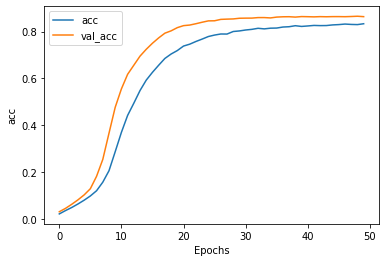

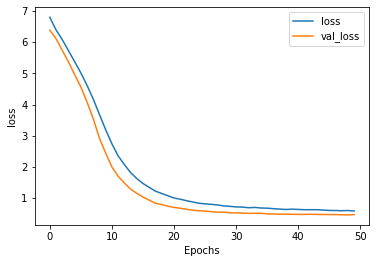

In [21]:
import matplotlib.pyplot as plt 
print(history.history.keys())
def plot_func(history, what):
  plt.plot(history.history[what])
  plt.plot(history.history['val_'+what])
  plt.xlabel("Epochs")
  plt.ylabel(what)
  plt.legend([what, 'val_'+what])
  plt.show()
  
plot_func(history, "acc")
plot_func(history, "loss")


# **Test with your own Sentence (Word)**

In [30]:
total_predictions = 10 
print(tokenizer.word_index)
predict_sentence = 'the'
for i in range(1,total_predictions):
  sequence_prediction = tokenizer.texts_to_sequences([predict_sentence])[0]
  padded_prediction = pad_sequences([sequence_prediction],maxlen = input_length, padding='pre')
  prediction = model.predict_classes(padded_prediction)
  predicted_word =""

  for word, index in tokenizer.word_index.items():
    if index == prediction : 
      predicted_word = word
      break
  predict_sentence += " " + predicted_word

print(predict_sentence)

{'and': 1, 'the': 2, 'to': 3, 'of': 4, 'my': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'love': 14, 'not': 15, 'but': 16, 'a': 17, 'me': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'you': 24, 'his': 25, 'which': 26, 'when': 27, 'it': 28, 'this': 29, 'by': 30, 'your': 31, 'doth': 32, 'do': 33, 'from': 34, 'on': 35, 'or': 36, 'no': 37, 'then': 38, 'have': 39, 'what': 40, 'are': 41, 'if': 42, 'more': 43, 'mine': 44, 'their': 45, 'shall': 46, 'sweet': 47, 'time': 48, 'will': 49, 'they': 50, 'beauty': 51, 'nor': 52, 'eyes': 53, 'art': 54, 'her': 55, 'heart': 56, 'yet': 57, 'o': 58, 'than': 59, 'can': 60, 'should': 61, 'thine': 62, 'now': 63, 'where': 64, 'make': 65, 'one': 66, 'hath': 67, 'he': 68, 'fair': 69, 'still': 70, 'how': 71, 'eye': 72, 'him': 73, 'like': 74, 'true': 75, 'see': 76, 'am': 77, 'she': 78, 'those': 79, 'though': 80, 'being': 81, 'some': 82, 'every': 83, 'such': 84, 'own': 85, 'were': 86, 'dost': 87, 'who': 88, 'liv